## Visualizing Classified Topics

The following notebook serves as example of how to visualize cliassfied `topic`s from a `window`.

The available visualizations are the following:
 * [WordClouds](#Wordcloud)
 * [Advanced WordClouds]()
 * [WordGraphs]()

In [1]:
# Add the path to the slack-pack/code/ folder in order to be able to import nlp module
import sys, os

NLP_PATH = '/'.join(os.path.abspath('.').split('/')[:-1]) + '/'
sys.path.append(NLP_PATH)

In [2]:
%matplotlib inline

### Loading the data

We will use a saved window to visualize the topics in this specific window.

In order to load the saved window, simplye unpickle the object:

In [3]:
import cPickle as pk

In [4]:
with open('../nlp/data/windows/tech_stuff_30m.pk', 'rb') as f:
    WINDOW = pk.load(f)

Let's get a brief summary of the topics inside the window:

In [5]:
WINDOW.report_topics()

Window has #7 topics

Topic length report:
  Topic # 0  --> size: 10 
  Topic # 1  --> size: 6  
  Topic # 2  --> size: 1  
  Topic # 3  --> size: 10 
  Topic # 4  --> size: 2  
  Topic # 5  --> size: 1  
  Topic # 6  --> size: 1  


Perfect, now let's get a-viz-ing!



### Wordcloud

In [6]:
# For creating the model
from nlp.grammar import tokenizer as nt
from nlp.models.summarization import TFIDF

# For the viz
from nlp.viz import cloud as vc

# Useful paths
FONT_PATH = '../nlp/data/font/Ranga-Regular.ttf'
IMG_FOLDER = '../nlp/data/img/'

/home/kjydavis/nlp/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Let's create a normal unigram model, the `SimpleCleaner()` will just remove symbols and typical stopwords.

In [7]:
model = TFIDF(window=WINDOW, cleaner=nt.SimpleCleaner())

Creating a wordcloud should be very easy... simply create a `Wordcloud` object by passing it a model and the topic number we are interested in summarizing:

__Note__ - *saving a wordcloud is very easy... simply call on `.save_png()` and pass the file path*

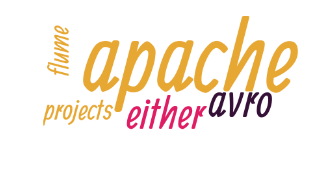

In [8]:
wordcloud = vc.Wordcloud(model, 2, max_words=10, font=FONT_PATH)  # defaults to 10 words
wordcloud.show()
# wordcloud.save_png(IMG_FOLDER + 'apache_styled.png')

We can also specify a title

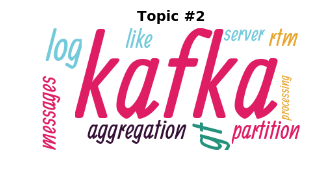

In [9]:
other_wordcloud = vc.Wordcloud(model, 3, max_words=10, font=FONT_PATH)
other_wordcloud.show(title='Topic #2')
# other_wordcloud.save_png(IMG_FOLDER + 'kafka_styled.png')

### N-Gram Wordclouds

Instead of only creating single-word wordclouds we can also create wordclouds with n-grams.

Additionally we can specify if we want to show the unigram wordlcoud side by side.

We are going to create two wordclouds:  
* Bigram Wordcloud
* Trigram Wordlcoud with the unigram wordcloud

In [10]:
# For creating the model
from nlp.grammar import tokenizer as nt
from nlp.models.summarization import TFIDF

# For the viz
from nlp.viz import cloud as vc

# Useful paths
FONT_PATH = '../nlp/data/font/Ranga-Regular.ttf'
IMG_FOLDER = '../nlp/data/img/'

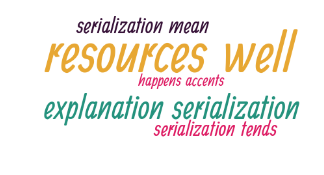

In [19]:
# Create the model
bi_model = TFIDF(window=WINDOW, cleaner=nt.SimpleCleaner(), n_grams=2)

# Create the viz
bi_wc = vc.Wordcloud(bi_model, 0, max_words=[5,5], font='../nlp/data/font/Ranga-Regular.ttf')
# bi_wc.save_png(IMG_FOLDER + 'bigram_good.png')
bi_wc.show()

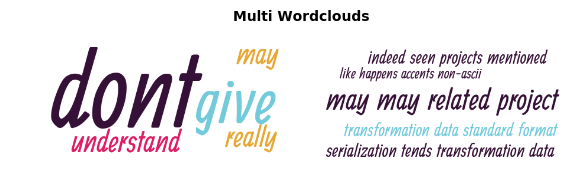

In [21]:
# Create the model
tri_model = TFIDF(window=WINDOW, cleaner=nt.SimpleCleaner(), n_grams=4)

# Create the viz
tri_multi_wc = vc.Wordcloud(tri_model, 0, max_words=[5,5], font='../nlp/data/font/Ranga-Regular.ttf', multi_plot=True)
# tri_multi_wc.save_png(IMG_FOLDER + 'bigram_good.png')
tri_multi_wc.show('Multi Wordclouds')

### N-Gram Graphs

In [15]:
# For creating the model
from nlp.grammar import tokenizer as nt
from nlp.models.summarization import TFIDF

# For the viz
from nlp.viz import graph as vg

# Useful paths
FONT_PATH = '../nlp/data/font/Ranga-Regular.ttf'
IMG_FOLDER = '../nlp/data/img/'

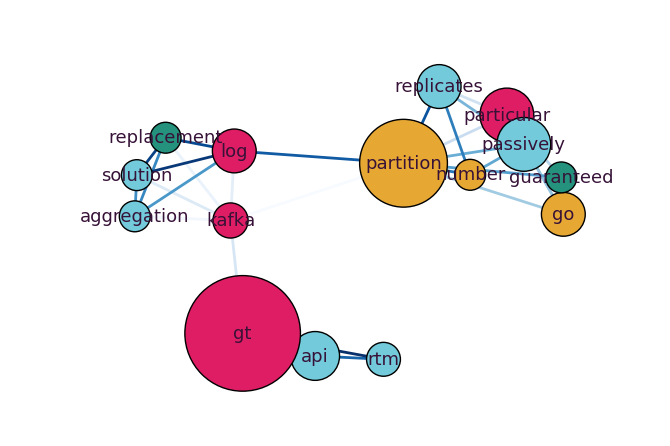

In [16]:
n_model = TFIDF(WINDOW, cleaner=nt.SimpleCleaner(), n_grams=5)

wgraph = vg.Wordgraph(n_model, document_id=3, max_words=8)
# wgraph.save_png(IMG_FOLDER + 'wordgraph_kafka.png')
wgraph.show()